 #  A Whale off the Port(folio)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning
Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns: read and clean data

In [2]:
# Reading whale returns
whaleReturns_csv = Path("whale_returns.csv")
whaleReturns_csv = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates = True, infer_datetime_format=True).sort_index()
whaleReturns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whaleReturns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whaleReturns_csv = whaleReturns_csv.dropna()
whaleReturns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whaleReturns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

In [6]:
# Reading algorithmic returns
algoReturns_csv = Path("algo_returns.csv")
algoReturns_csv = pd.read_csv('algo_returns.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True).sort_index()
algoReturns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algoReturns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algoReturns_csv = algoReturns_csv.dropna()
algoReturns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

In [9]:
# Reading S&P 500 Closing Prices
sp500History_csv = Path("sp500_history.csv")
sp500History_csv = pd.read_csv('sp500_history.csv', index_col= 'Date', parse_dates = True, infer_datetime_format = True).sort_index()
sp500History_csv.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500History_csv.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
#Got error need to convert string to float- try remove $
sp500History_csv['Close'] = sp500History_csv['Close'].str.replace("$", "")

sp500History_csv['Close'] = sp500History_csv['Close'].astype("float")
sp500History_csv.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500History_csv = sp500History_csv.pct_change()
sp500History_csv.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500History_csv = sp500History_csv.dropna()
sp500History_csv.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
sp500History_csv = sp500History_csv.rename(columns = {'Close':'S&P 500'})
sp500History_csv.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
allReturns_df = pd.concat([whaleReturns_csv, algoReturns_csv, sp500History_csv], axis = 'columns', join = 'inner')
allReturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

## Performance

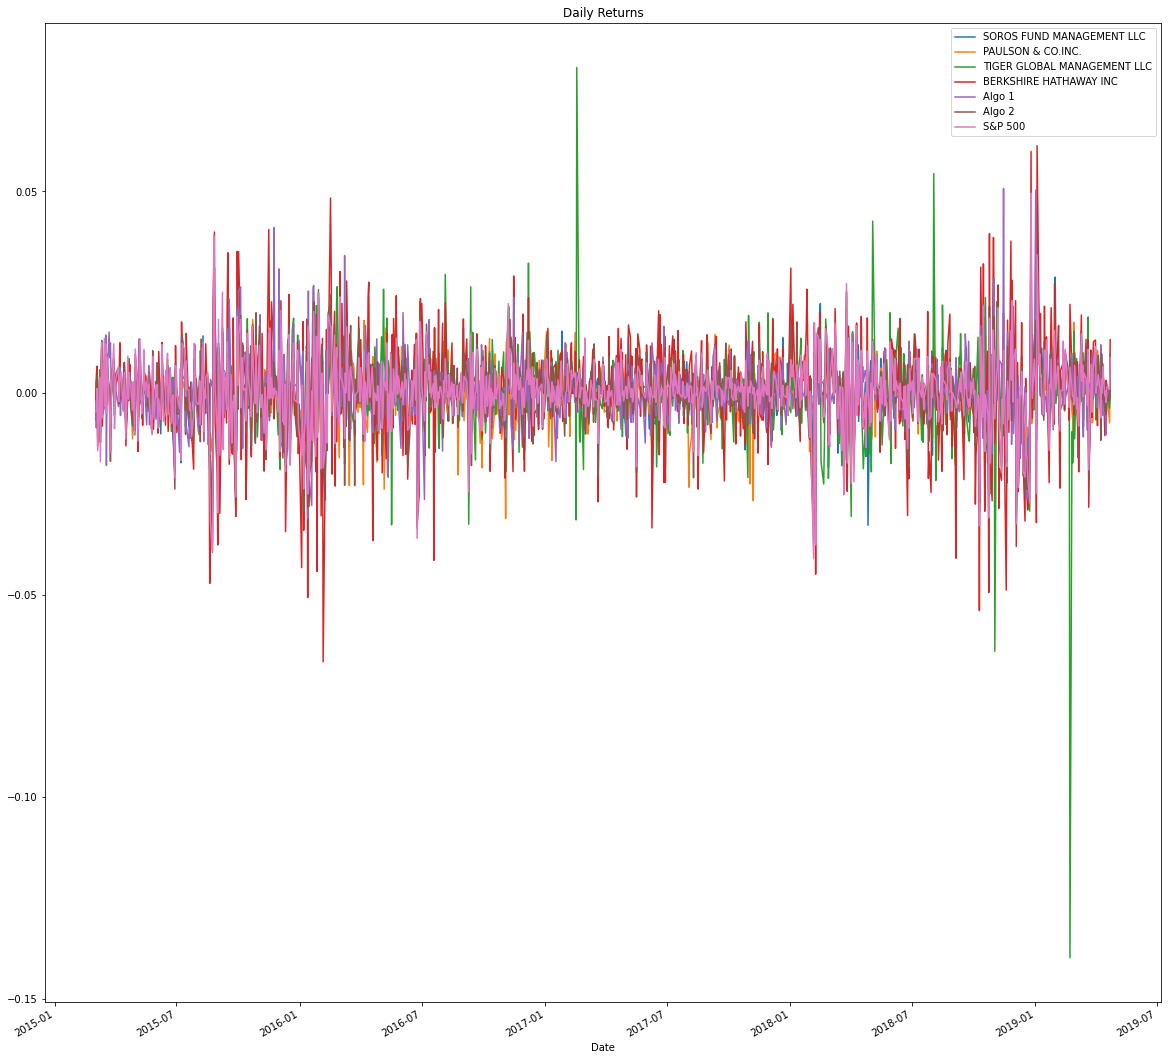

In [16]:
# Plot daily returns
allReturns_plot = allReturns_df.plot(figsize = (20, 20), title = 'Daily Returns');

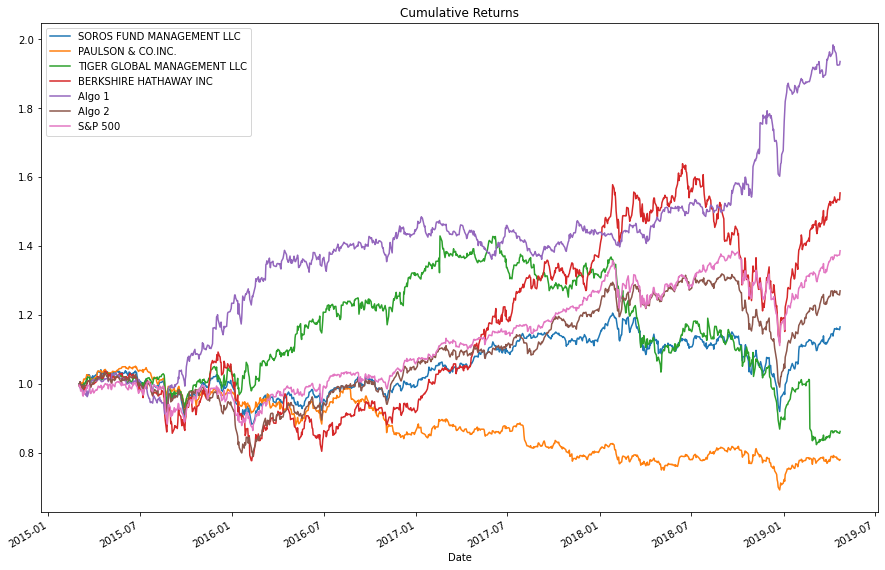

In [17]:
# Plot cumulative returns
cumlReturns = (1 + allReturns_df).cumprod()
cumlativeReturns_plot = cumlReturns.plot(figsize = (15, 10), title = 'Cumulative Returns');

## Risk

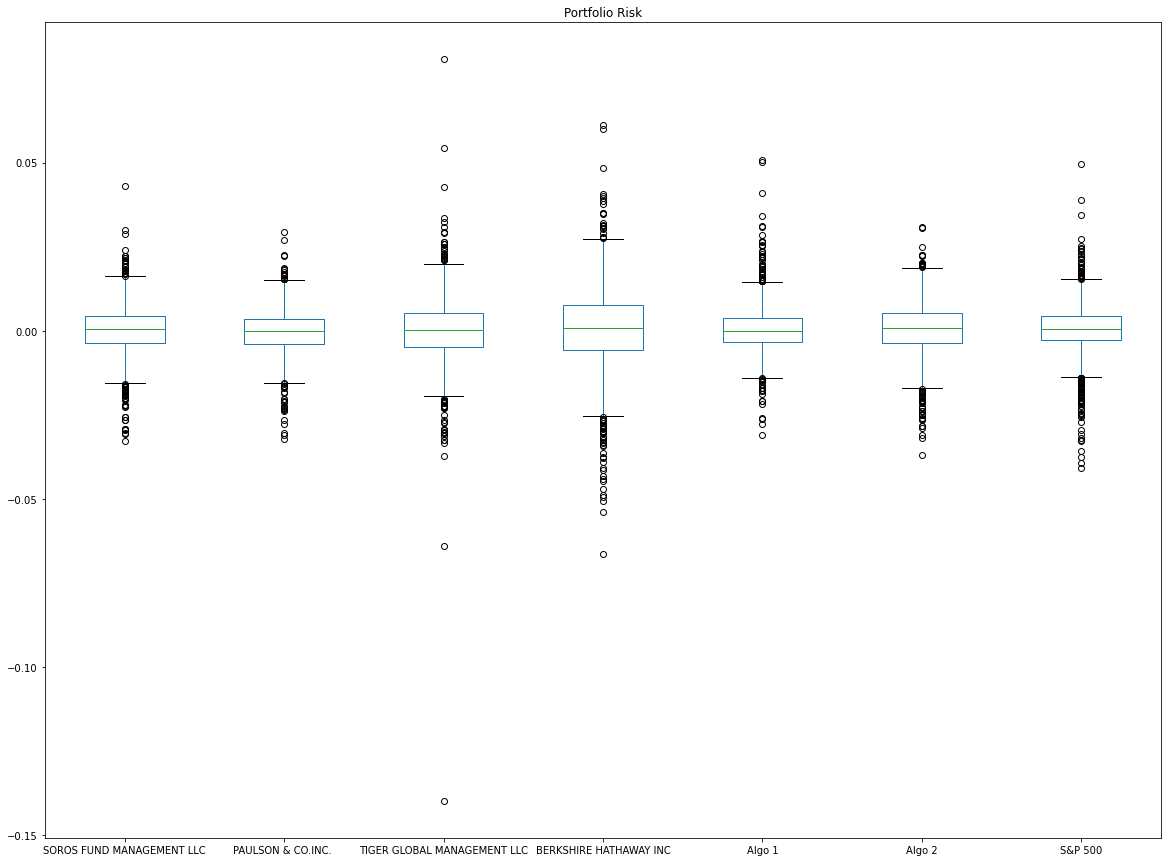

In [18]:
# Box plot to visually show risk
allReturns_df.plot.box(figsize = (20, 15), title = 'Portfolio Risk');

Determination: 
    Tiger Global Management and Bershire Hathaway are riskier than the S&P 500

---

In [19]:
# Calculate the standard deviation for each portfolio. 
# Sort for cleaner look
allReturns_df.std().sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
spRisk = allReturns_df['S&P 500'].std()
spRisk
allReturns_df.std() > spRisk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
anulStd = allReturns_df.std() * np.sqrt(252)
anulStd

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Analysis Results:

1.The risk for each portfolio increases at the same time as the risk increases for the S&P 500 index. Almost like a mirror imagine, with the exeption of Tiger Global and Berkshire Hathaway. Bershire Hathaway at the end of 2015/ early 2016 spiked as market volitility was low. Tiger Global spiked in warly 2017 and again in early to mid 2019 in comparison to the S&P 500.

2.The returns that closely mimic the S&P 500 are Algo 2 and Soros Fund Management.

3.The portfolio does seem sensitive to the movements in the S&P 500.
    

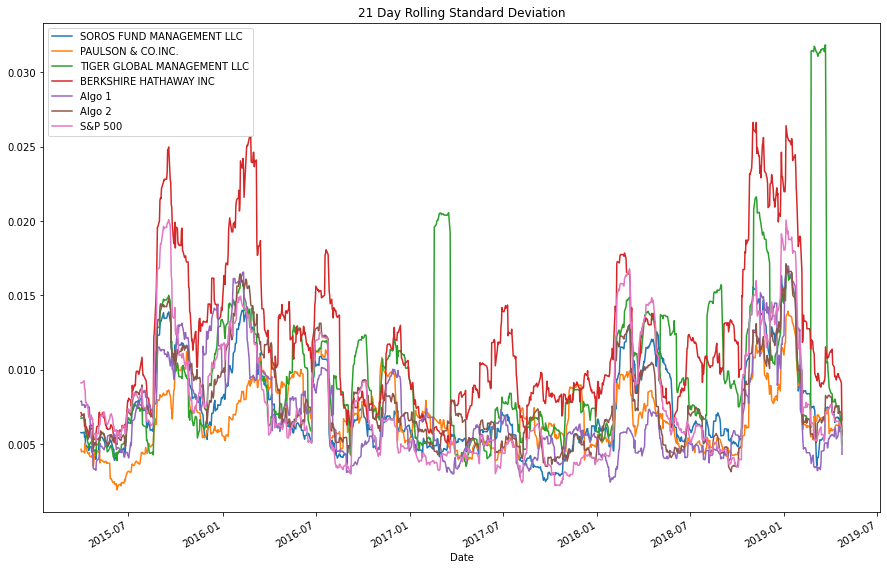

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

allReturns_df.rolling(window=21).std().plot(figsize=(15,10), title = '21 Day Rolling Standard Deviation');

In [23]:
# Construct a correlation table
ReturnsCor = allReturns_df.corr()
ReturnsCor

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


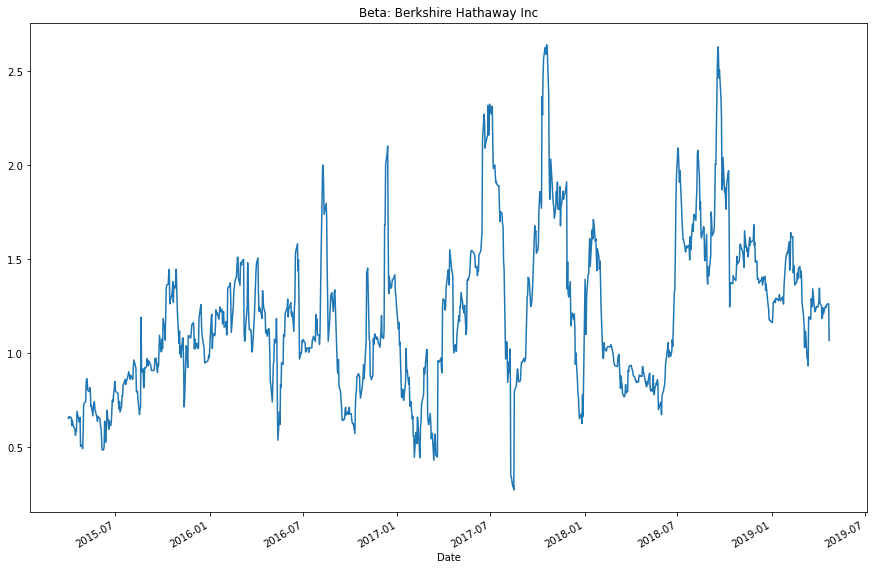

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#Calculate Covariance
covariance = allReturns_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(allReturns_df['S&P 500'])

#Calculate Variance
variance = allReturns_df['S&P 500'].rolling(window=21).var()

#Calculate Beta
brkBeta = covariance/variance

#Plotting Beta
brkBeta_plot = brkBeta.plot(figsize = (15, 10), title = "Beta: Berkshire Hathaway Inc");

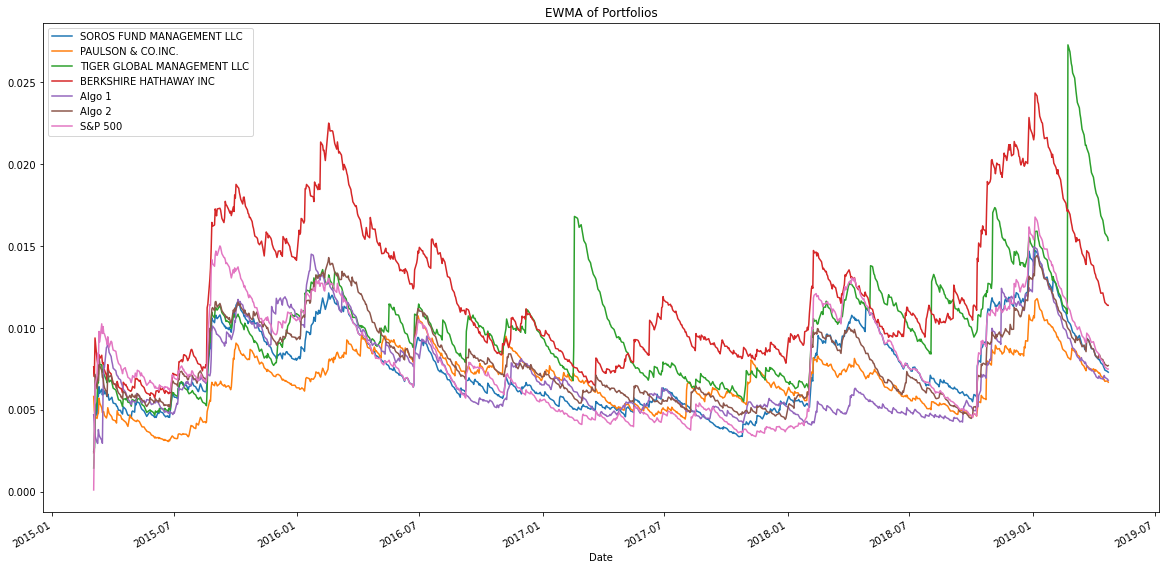

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
allReturns_df.ewm(halflife=21).std().plot(figsize=(20,10), title = "EWMA of Portfolios");

---

## Sharpe Ratios

In [26]:
# Calculate annualized Sharpe Ratios
sharpeRatio = allReturns_df.mean()*252 / (allReturns_df.std()*np.sqrt(252))
sharpeRatio.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

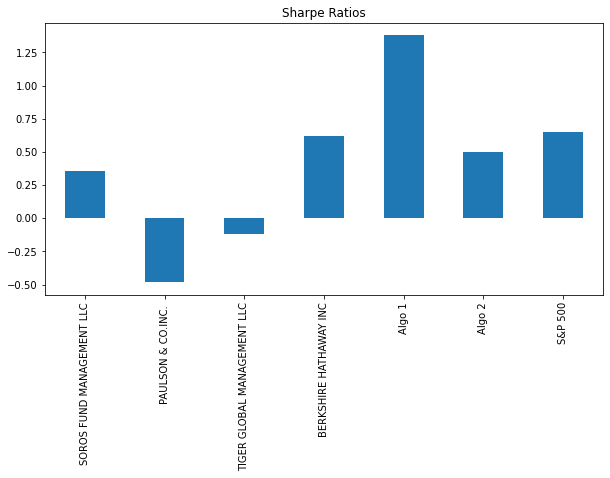

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpeRatio_plot = sharpeRatio.plot(kind = 'bar', figsize = (10, 5), title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Algo 1 strategy outperformed both the market and whales. Algo 2 strategy did not outperform the market, and out performed three of the four whales.

---

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
xrx = pd.read_csv('XRX.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
xrx.head()

,Close
Date,
2018-12-03,27.50
2018-12-04,26.70
2018-12-06,26.64
2018-12-07,25.51
2018-12-10,25.00


In [29]:
# Read the second stock
x = pd.read_csv('X.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
x.head()

,Close
Date,
2018-12-03,23.76
2018-12-04,22.57
2018-12-06,22.01
2018-12-07,21.31
2018-12-10,20.82


In [30]:
# Read the third stock
msft = pd.read_csv('MSFT.csv', index_col = "Date", parse_dates = True, infer_datetime_format = True)
msft.head()

,Close
Date,
2018-12-03,112.09
2018-12-04,108.52
2018-12-06,109.19
2018-12-07,104.82
2018-12-10,107.59


In [31]:
# Concatenate all stocks into a single DataFrame
xrx_x_msft = pd.concat([xrx['Close'], x['Close'], msft['Close']], axis = 'columns', join = 'inner')
xrx_x_msft

,Close,Close,Close
Date,,,
2018-12-03,27.50,23.76,112.09
2018-12-04,26.70,22.57,108.52
2018-12-06,26.64,22.01,109.19
2018-12-07,25.51,21.31,104.82
2018-12-10,25.00,20.82,107.59
...,...,...,...
2020-10-28,17.23,9.35,202.68
2020-10-29,17.65,9.83,204.72
2020-10-30,17.38,9.66,202.47


In [32]:
# Pivot so that each column of prices represents a unique symbol
xrx_x_msft.columns = ['XRX', 'X', 'MSFT']
xrx_x_msft.head()

,XRX,X,MSFT
Date,,,
2018-12-03,27.50,23.76,112.09
2018-12-04,26.70,22.57,108.52
2018-12-06,26.64,22.01,109.19
2018-12-07,25.51,21.31,104.82
2018-12-10,25.00,20.82,107.59


In [33]:
# Drop Nulls
xrx_x_msft.dropna()

,XRX,X,MSFT
Date,,,
2018-12-03,27.50,23.76,112.09
2018-12-04,26.70,22.57,108.52
2018-12-06,26.64,22.01,109.19
2018-12-07,25.51,21.31,104.82
2018-12-10,25.00,20.82,107.59
...,...,...,...
2020-10-28,17.23,9.35,202.68
2020-10-29,17.65,9.83,204.72
2020-10-30,17.38,9.66,202.47


In [34]:
#CHECK
xrx_x_msft.isnull().sum()

XRX     0
X       0
MSFT    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
xrx_x_msftReturns = xrx_x_msft.dot(weights)
xrx_x_msftReturns.head()

Date
2018-12-03    54.450000
2018-12-04    52.596667
2018-12-06    52.613333
2018-12-07    50.546667
2018-12-10    51.136667
dtype: float64

In [36]:
# Percent Change
xrx_x_msft = xrx_x_msftReturns.pct_change()

In [37]:
xrx_x_msft.dropna().head()

Date
2018-12-04   -0.034037
2018-12-06    0.000317
2018-12-07   -0.039280
2018-12-10    0.011672
2018-12-11    0.004824
dtype: float64

In [38]:
xrx_x_msft.isnull().sum()

1

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
#Ran Code originally and worked, restarted then didn't flipped code around and now works. Check again before submit.
allReturns_df['Custom'] = xrx_x_msft
allReturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allReturns_df = allReturns_df.dropna().copy()
allReturns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-12-04,-0.025610,-0.015528,-0.030254,-0.037941,0.000822,-0.031953,-0.032365,-0.034037
2018-12-06,0.004427,-0.001312,-0.005373,0.007661,-0.006886,-0.003116,-0.001522,0.000317
2018-12-07,-0.019902,-0.012730,-0.022698,-0.024372,0.003690,-0.015535,-0.023320,-0.039280
2018-12-10,-0.009854,-0.004736,-0.007709,-0.002190,-0.016156,-0.004270,0.001762,0.011672
2018-12-11,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542,-0.000356,0.004824
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.001393
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.003304
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.007221


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
risk = allReturns_df.std()*np.sqrt(252)
risk.sort_values()

PAULSON & CO.INC.              0.134987
Algo 1                         0.142469
SOROS FUND MANAGEMENT LLC      0.161153
Algo 2                         0.163932
S&P 500                        0.176626
BERKSHIRE HATHAWAY INC         0.246353
Custom                         0.266477
TIGER GLOBAL MANAGEMENT LLC    0.283543
dtype: float64

In [42]:
# Rolling
rolling = allReturns_df.rolling(window=21).std()
rolling.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-01-04,0.017118,0.013601,0.016988,0.026416,0.016709,0.017099,0.020069,0.028086
2019-01-07,0.016535,0.013777,0.016567,0.025602,0.016971,0.016511,0.019146,0.027421
2019-01-08,0.016711,0.013931,0.016603,0.025573,0.016959,0.016742,0.019332,0.027626
2019-01-09,0.016294,0.013669,0.016016,0.025411,0.016965,0.016599,0.018738,0.026597
2019-01-10,0.016151,0.013633,0.016108,0.025408,0.016421,0.016595,0.018766,0.026434


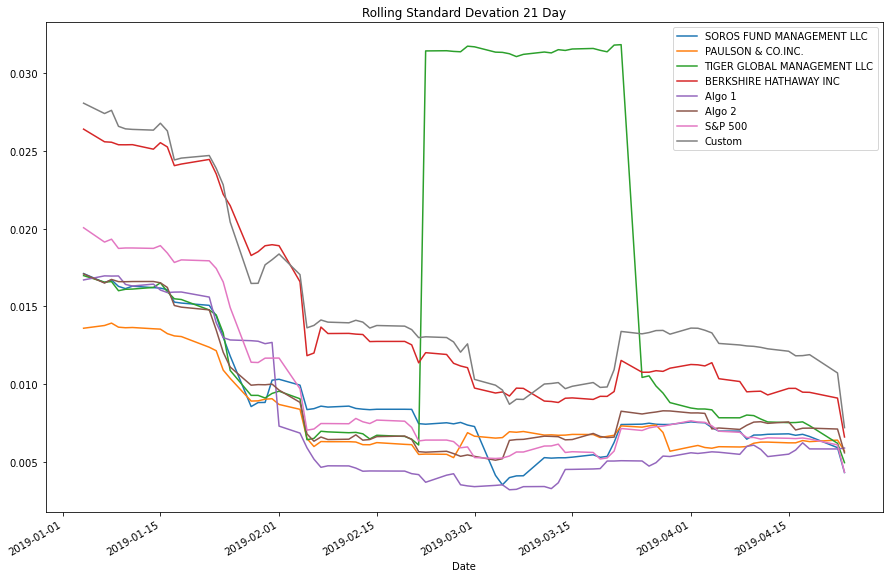

In [43]:
#Rolling Plot
rolling.plot(figsize = (15, 10), title = 'Rolling Standard Devation 21 Day');

In [44]:
# Annualized Sharpe Ratios
sharpeRatio = allReturns_df.mean()/allReturns_df.std() *np.sqrt(252)
sharpeRatio.sort_values(ascending= False)

BERKSHIRE HATHAWAY INC         1.724044
Algo 1                         1.603362
SOROS FUND MANAGEMENT LLC      1.389866
Algo 2                         1.121296
Custom                         0.861866
S&P 500                        0.839536
PAULSON & CO.INC.             -0.013450
TIGER GLOBAL MANAGEMENT LLC   -1.717059
dtype: float64

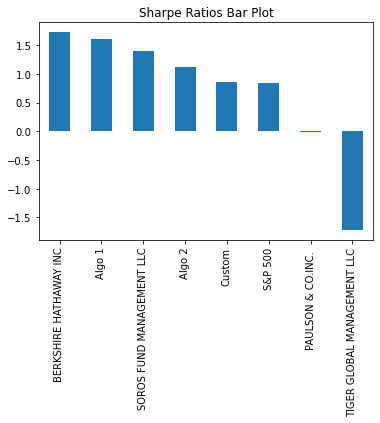

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpeRatio.sort_values(ascending=False).plot(kind='bar', title='Sharpe Ratios Bar Plot');

In [46]:
# Create a correlation analysis
allReturns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.835020,0.500321,0.853010,0.357728,0.878178,0.888201,0.784616
PAULSON & CO.INC.,0.835020,1.000000,0.425381,0.733593,0.432964,0.820736,0.786049,0.685643
TIGER GLOBAL MANAGEMENT LLC,0.500321,0.425381,1.000000,0.339884,0.169264,0.390671,0.445098,0.389753
BERKSHIRE HATHAWAY INC,0.853010,0.733593,0.339884,1.000000,0.288164,0.833554,0.911820,0.880011
Algo 1,0.357728,0.432964,0.169264,0.288164,1.000000,0.443004,0.304509,0.260311
Algo 2,0.878178,0.820736,0.390671,0.833554,0.443004,1.000000,0.885789,0.823954
S&P 500,0.888201,0.786049,0.445098,0.911820,0.304509,0.885789,1.000000,0.928712
Custom,0.784616,0.685643,0.389753,0.880011,0.260311,0.823954,0.928712,1.000000


In [47]:
# Beta = covariance/variance
covariance = allReturns_df['Custom'].rolling(window=21).cov(allReturns_df['S&P 500'])
variance = allReturns_df['S&P 500'].rolling(window=21).var()
beta = covariance/variance

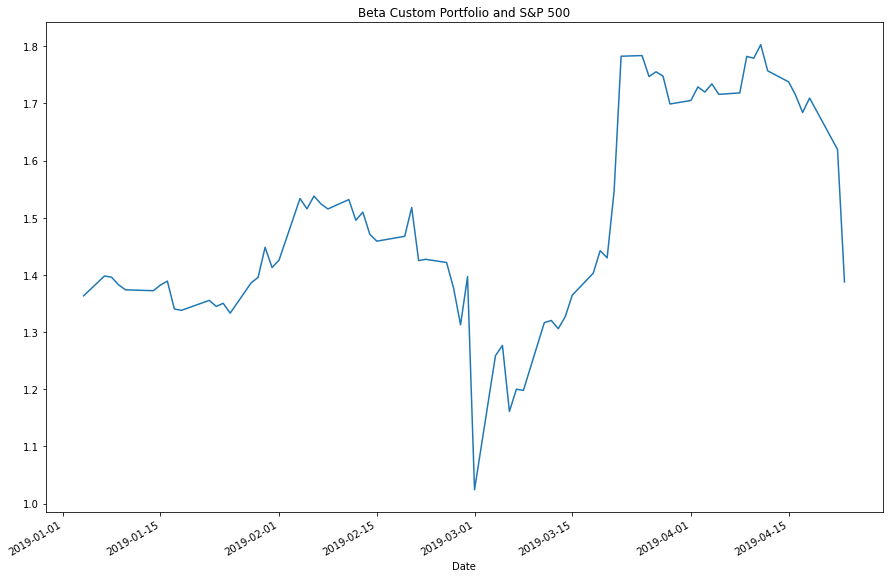

In [48]:
# Beta Plot
beta.plot(figsize=(15,10), title = 'Beta Custom Portfolio and S&P 500');
